# Sprint ゲート付きリカレントニューラルネットワーク

## 【問題1】各種手法の実行

* SimpleRNN, GRU, LSTM, ConvLSTM2Dの4種類のRecurrentレイヤーを実行してください。
* SimpleRNN, GRU, LSTMによる精度比較を行ってください。


In [20]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pylab as plt

from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import SimpleRNNCell
from tensorflow.keras.layers import GRUCell
from tensorflow.keras.layers import LSTMCell

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import StackedRNNCells

from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

### imdbデータセットの準備

In [4]:
# imdbデータセットの準備
from keras.datasets import imdb

In [5]:
# 単語量50000に設定した後、訓練・試験に2分割

vocabulary_size = 50000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [6]:
# データをサンプル確認

print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 32677, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 26441, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 33740, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [7]:
# imdb.get_word_index()を用いて、上記のサンプルデータからIDを文字に変換

word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'rocketed', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', "captain's", 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', "kevin's", 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because

In [8]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [9]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [10]:
# RNNモデルに投入する前に、入力サイズを一括化する処置を行う。
# サイズ(max_words)は500に設定する。

from keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# データセットの準備完了

### SimpleRNN model

In [9]:
# SimpleRNN model

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(512, return_sequences=False, input_shape=(max_words, 32), unroll=True))
# model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(500, activation="relu")) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           1600000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 512)               279040    
_________________________________________________________________
dense (Dense)                (None, 500)               256500    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 2,136,041
Trainable params: 2,136,041
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64, verbose=1)

391/391 [==============================] - 1206s 3s/step - loss: 0.7575 - accuracy: 0.5051 - val_loss: 0.6934 - val_accuracy: 0.5000


In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 295s 377ms/step - loss: 0.6934 - accuracy: 0.5000
Accuracy: 50.00%


### GRU model

In [33]:
# GRU model

embedding_size=32
model_GRU = Sequential()
model_GRU.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_GRU.add(GRU(100))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model_GRU.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 1,640,301
Trainable params: 1,640,301
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Train
model_GRU.fit(X_train, y_train, epochs=1, batch_size=64, verbose=1)

391/391 [==============================] - 159s 407ms/step - loss: 0.4923 - accuracy: 0.7482


In [18]:
# Final evaluation of the model
scores = model_GRU.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 64s 82ms/step - loss: 0.3540 - accuracy: 0.8504
Accuracy: 85.04%


### LSTM model

In [32]:
# LSTM model

embedding_size=32
model_LSTM=Sequential()
model_LSTM.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,653,301
Trainable params: 1,653,301
Non-trainable params: 0
_________________________________________________________________
None


* 1 embedding
* 1 LSTM
* 1 dense layers
* 213,301 parameters in total need to be trained.

In [20]:
# Train

# batch_size = 64
# num_epochs = 3
# X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
# X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

# model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)
model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=1)

391/391 [==============================] - 965s 2s/step - loss: 0.6969 - accuracy: 0.5068


In [21]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 58.97%


### ConvLSTM2D

In [11]:
# ConvLSTM2d

model_ConvLSTM = Sequential()
model_ConvLSTM.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
model_ConvLSTM.add(BatchNormalization())

model_ConvLSTM.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model_ConvLSTM.add(BatchNormalization())

model_ConvLSTM.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model_ConvLSTM.add(BatchNormalization())

model_ConvLSTM.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model_ConvLSTM.add(BatchNormalization())

model_ConvLSTM.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
model_ConvLSTM.compile(loss='binary_crossentropy', optimizer='adadelta')
print(model_ConvLSTM.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization (BatchNo (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  1

In [12]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [14]:
X_train, y_train = generate_movies(n_samples=1200)

In [15]:
# Fit the model
model_ConvLSTM.fit(X_train[:1000], y_train[:1000], epochs=1, batch_size=10, verbose=1)

100/100 [==============================] - 2537s 25s/step - loss: 0.8600


In [18]:
which = 1004
track = X_train[which][:7, ::, ::, ::]

In [19]:
for j in range(16):
    new_pos = model_ConvLSTM.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

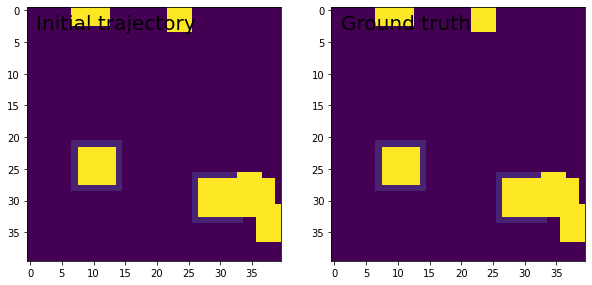

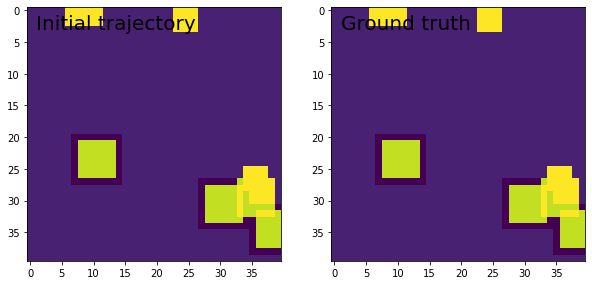

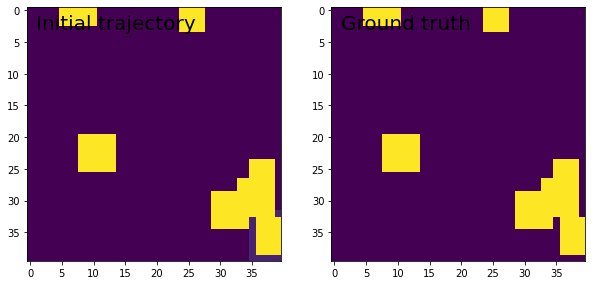

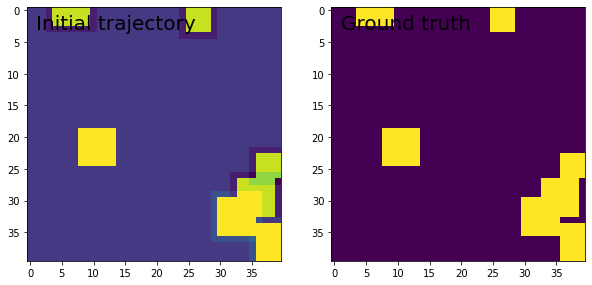

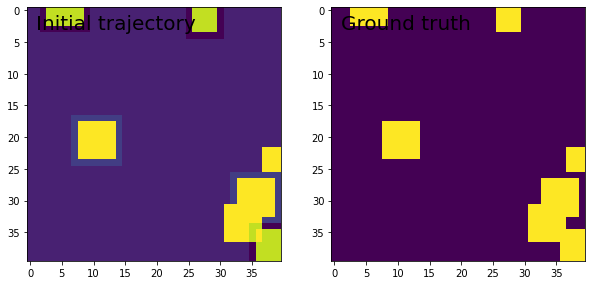

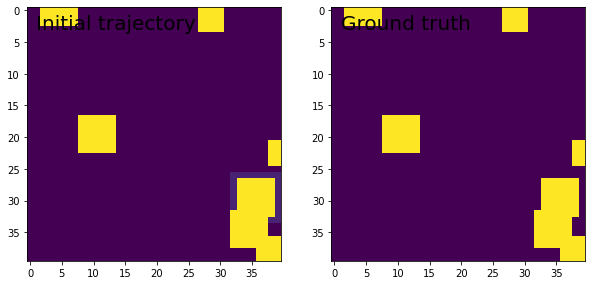

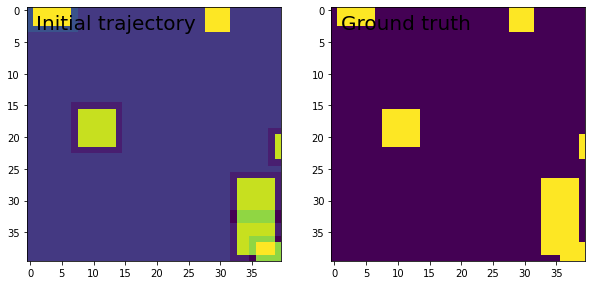

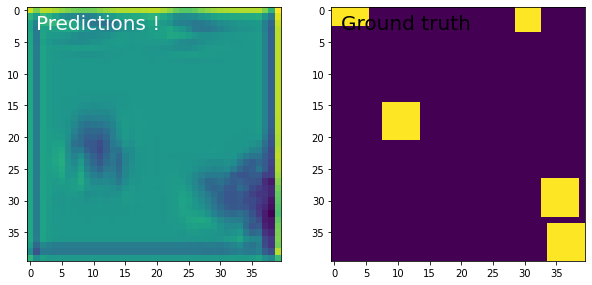

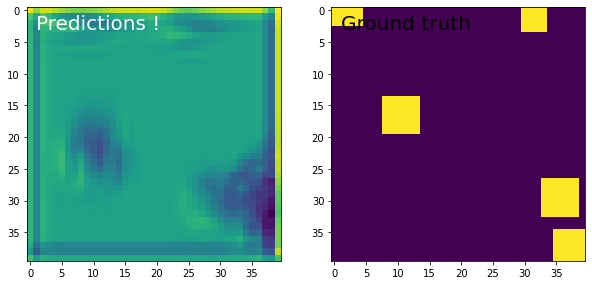

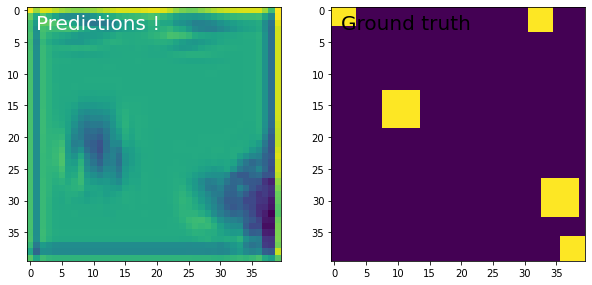

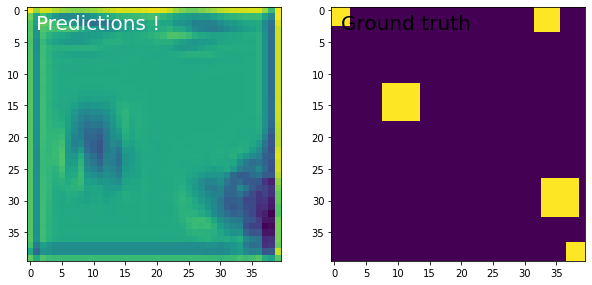

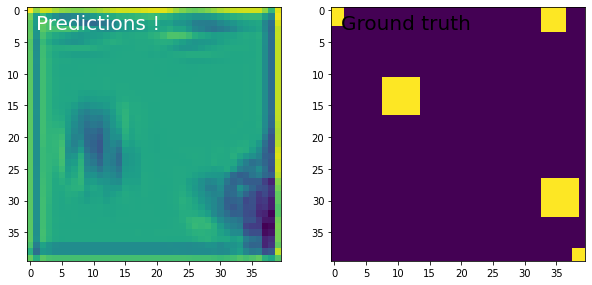

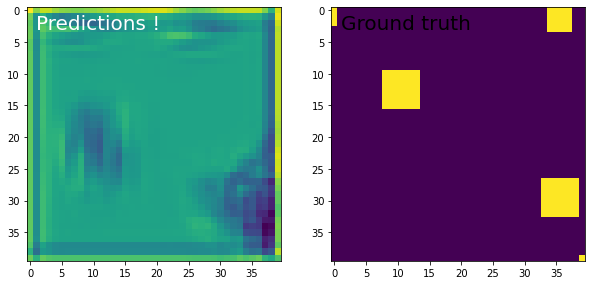

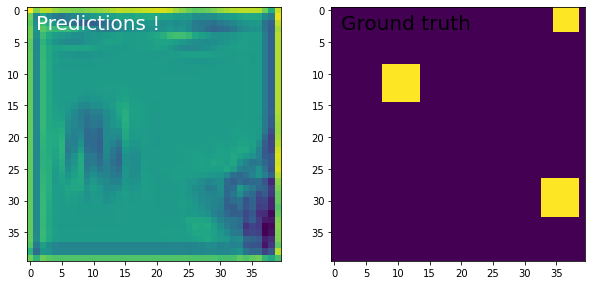

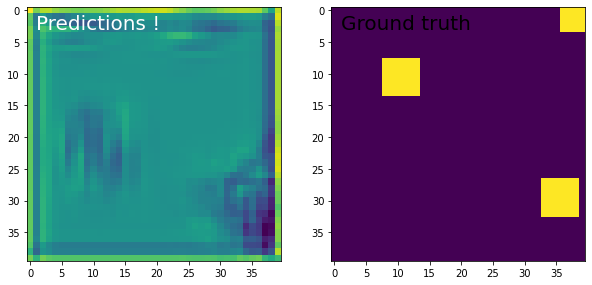

In [22]:
# And then compare the predictions
# to the ground truth
track2 = X_train[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = y_train[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)

## 【問題2】（アドバンス課題）複数のデータセット間での比較

## 【問題3】他のクラスの説明

* RNN
  * 与えられた時系列データから、次に得られるであろうデータを予測する方法の一つ
  * 一連の入力データから一連の出力データを吐き出す。
  * 通常のニューラルネットワーク同様、ある層の出力は次の層の入力となる。
  * RNNの場合は、各層の出力を最後の層と同様に扱う。
  * RNNの場合、各時系列毎の隠れ層が同一構造で流用される。

* SimpleRNNCell
  * 再帰的に出現する同一のネットワーク構造（隠れ層）のことをセル（cell）と呼ぶ。
* GRUCell
  * GRUのためのcell
* LSTMCell
  * LSTMのためのcell
* StackedRNNCells
  * 複数のRNN cellを単一のcellのようにするためのrapper
  * 効率的なstacked RNNを実装するために使われる。
* CuDNNGRU
  * CuDNNを利用した高速なGRU実装
  * TensorFlowバックエンドでGPU上でのみ動作する。
* CuDNNLSTM
  * CuDNNを利用した高速なLSTM実装
  * TensorFlowバックエンドでGPU上でのみ動作する。